<a href="https://colab.research.google.com/github/Nate20067/getCooked/blob/main/RNN_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recurrent Neural Network

In [1]:
 #Import the dependencies
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.preprocessing import MinMaxScaler

In [3]:
#Import the dataset used
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#Gets location of all the rows in column one
training_data = dataset.iloc[:,1:2].values

In [5]:
#Scaling the data
#Scales the data in the dataset to values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
#Scaling the trained data set
scaled_trainData = scaler.fit_transform(training_data)

In [6]:
X_trainData = [] #Input
Y_TrainData = [] #Output
for i in range(60,1258):
  X_trainData.append(scaled_trainData[i-60:i,0]) #Appends value at i, data for training list
  Y_TrainData.append(scaled_trainData[i,0]) #Appends value at i to output list which is target value

#Transform python arrays to numpy arrays
X_trainData = np.array(X_trainData)
Y_TrainData = np.array(Y_TrainData)

#Reshape the Training data
#Data is grouped by 1198(1258-60) by 60 different arrays
X_trainData = np.reshape(X_trainData,(X_trainData.shape[0], X_trainData.shape[1], 1))

In [7]:
from keras import Sequential
#Neural Network layers
from keras.layers import Dense, LSTM, Dropout

In [8]:
#Building the RNN model
#Sequential is linear stack of layers
regressor_model = Sequential([
    #RNN Hidden layer
    LSTM(50, return_sequences=True, input_shape=(X_trainData.shape[1], 1)),
    #Dropout drops the unneeded data for the model
    Dropout(0.2),
    #RNN Hidden layer 2
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    #RNN Last Hidden Layer
    LSTM(50),
    Dropout(0.2),
    #Output Layer for the model
    Dense(1, activation='linear')
])

In [9]:
#Compiling the model

from keras.optimizers import Adam
#Using Adam optimizer for big data
#Loss function mean_squared_erorr as its compiling a regression problem
regressor_model.compile(Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [10]:
#Training the model
regressor_model.fit(X_trainData, Y_TrainData, batch_size=32, epochs=150, validation_split=0.2, verbose=2)

Epoch 1/150
30/30 - 11s - loss: 0.1166 - mean_absolute_error: 0.2057 - val_loss: 0.0107 - val_mean_absolute_error: 0.0951 - 11s/epoch - 352ms/step
Epoch 2/150
30/30 - 3s - loss: 0.0065 - mean_absolute_error: 0.0605 - val_loss: 0.0195 - val_mean_absolute_error: 0.1337 - 3s/epoch - 104ms/step
Epoch 3/150
30/30 - 3s - loss: 0.0036 - mean_absolute_error: 0.0451 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285 - 3s/epoch - 91ms/step
Epoch 4/150
30/30 - 2s - loss: 0.0031 - mean_absolute_error: 0.0409 - val_loss: 0.0014 - val_mean_absolute_error: 0.0278 - 2s/epoch - 80ms/step
Epoch 5/150
30/30 - 2s - loss: 0.0031 - mean_absolute_error: 0.0405 - val_loss: 0.0056 - val_mean_absolute_error: 0.0681 - 2s/epoch - 80ms/step
Epoch 6/150
30/30 - 2s - loss: 0.0033 - mean_absolute_error: 0.0422 - val_loss: 0.0018 - val_mean_absolute_error: 0.0319 - 2s/epoch - 76ms/step
Epoch 7/150
30/30 - 3s - loss: 0.0028 - mean_absolute_error: 0.0382 - val_loss: 0.0023 - val_mean_absolute_error: 0.0374 - 3s/epoch 

In [11]:
#Loading the Test Data
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
#Getting all rows in column 1
real_priceOfStock = data_test.iloc[:,1:2].values

In [13]:
#Preparing the Test Data
datasetTotal = pd.concat((dataset['Open'], data_test['Open']), axis=0)
inputs = datasetTotal[len(datasetTotal) - len(data_test) - 60:].values
#Reshapes the test data into a 2D Array
inputs = inputs.reshape(-1,1)
#Scales the input test data
inputs = scaler.transform(inputs)

In [14]:
#Passing the test data into an array
X_test = [] #Data to be tested
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

#Transform _tst python array into numpy array
X_test = np.array(X_test)
#Reshape the test Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
#Use the model to predict the Test Data
predicted_priceOf_stock = regressor_model.predict(X_test, batch_size=32)
predicted_priceOf_stock = scaler.inverse_transform(predicted_priceOf_stock)

1/1 [==============================] - 2s 2s/step


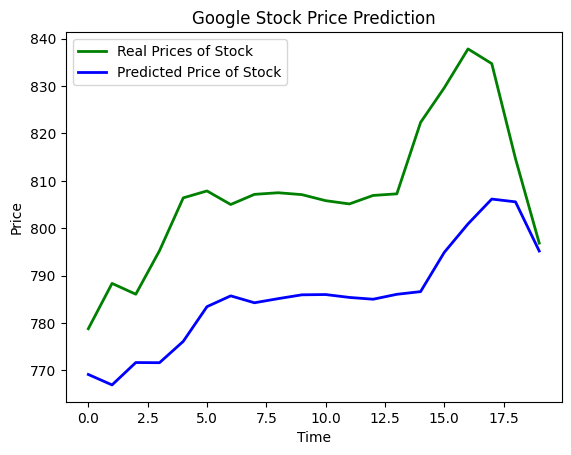

In [17]:
#Showing the graphed model
plt.plot(real_priceOfStock, color='green', label="Real Prices of Stock", linewidth=2)
plt.plot(predicted_priceOf_stock, color='blue', label="Predicted Price of Stock", linewidth=2)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
print("The Predicted price of stock on 1/4/17 Open is", predicted_priceOf_stock[1])

The Predicted price of stock on 1/4/17 Open is [766.9523]
